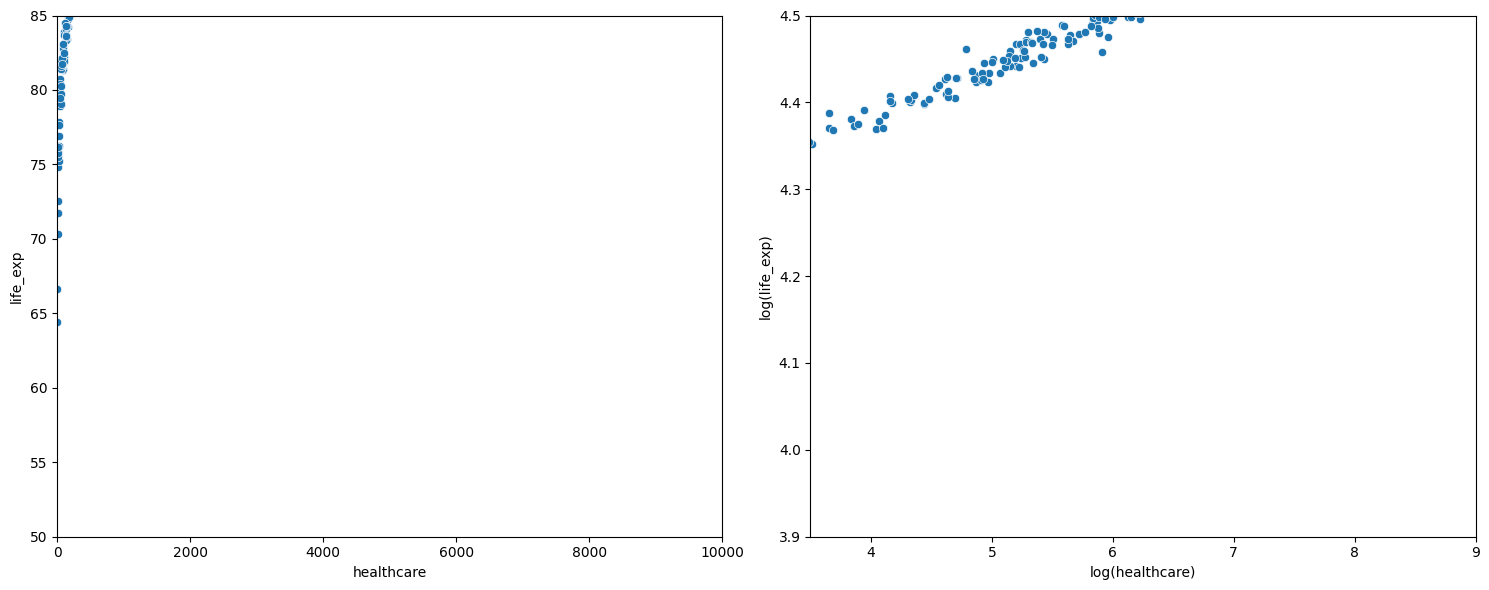

    healthcare   life_exp  log_healthcare  log_life_exp
0   234.634045  88.112195        5.458027      4.478611
1  1505.060715  98.479736        7.316589      4.589851
2   658.372847  92.203469        6.489771      4.523998
3   456.471277  89.863893        6.123526      4.498296
4    84.812435  81.312696        4.440442      4.398302
        healthcare    life_exp  log_healthcare  log_life_exp
count   220.000000  220.000000      220.000000    220.000000
mean    937.761448   89.281132        5.843373      4.488218
std    1690.520532    7.474035        1.483182      0.085326
min       2.768710   64.430121        1.018382      4.165581
25%     142.170160   84.427409        4.956917      4.435892
50%     370.901667   89.787400        5.915933      4.497445
75%     850.285243   94.046716        6.745571      4.543792
max    9188.433508  106.609868        9.125701      4.669176


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 200

# Healthcare spending (exponential distribution with lower scale to concentrate points below 2000)
healthcare = np.random.exponential(scale=500, size=n_samples)

# Add a few high-cost outliers
healthcare = np.concatenate([healthcare, np.random.uniform(2000, 10000, 20)])

# Life expectancy (logarithmic function of healthcare spending with some noise)
life_exp = 60 + 5 * np.log(healthcare) + np.random.normal(0, 1, n_samples + 20)

# Create DataFrame
df = pd.DataFrame({
    'healthcare': healthcare,
    'life_exp': life_exp
})

# Add log-transformed columns
df['log_healthcare'] = np.log(df['healthcare'])
df['log_life_exp'] = np.log(df['life_exp'])

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Original data
sns.scatterplot(data=df, x='healthcare', y='life_exp', ax=ax1)
ax1.set_xlabel('healthcare')
ax1.set_ylabel('life_exp')
ax1.set_xlim(0, 10000)
ax1.set_ylim(50, 85)

# Plot 2: Log-transformed data
sns.scatterplot(data=df, x='log_healthcare', y='log_life_exp', ax=ax2)
ax2.set_xlabel('log(healthcare)')
ax2.set_ylabel('log(life_exp)')
ax2.set_xlim(3.5, 9)
ax2.set_ylim(3.9, 4.5)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Display first few rows of the DataFrame
print(df.head())

# Display summary statistics
print(df.describe())